In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r /content/drive/MyDrive/Data/ASL /content/

Load data

In [ ]:
import tensorflow as tf

BATCH_SIZE = 32
IMG_SIZE = (64,64)

train_set = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/ASL/train',
    label_mode='categorical',
    color_mode='grayscale',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_set = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/ASL/test',
    label_mode='categorical',
    color_mode='grayscale',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

val_set = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/ASL/val',
    label_mode='categorical',
    color_mode='grayscale',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

class_names = train_set.class_names
NUM_CLASSES = len(class_names)
print("🧾 Class names:", class_names)
print("🔢 Tổng số class:", NUM_CLASSES)

for x, y in train_set.take(1):
    print(x.shape)

Found 10171 files belonging to 29 classes.
Found 2181 files belonging to 29 classes.
Found 2178 files belonging to 29 classes.
🧾 Class names: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']
🔢 Tổng số class: 29
(32, 64, 64, 1)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_set = train_set.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_set = test_set.cache().prefetch(buffer_size=AUTOTUNE)
val_set = val_set.cache().prefetch(buffer_size=AUTOTUNE)

Build CNN model

In [ ]:
from tensorflow.keras import layers, models

# có thể thay stride = 2 (=> linh hoạt hơn maxpooling)

model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 1)),

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 64, 64, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 29)             │         7,453 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,280,029 (4.88 MB)

 Trainable params: 1,280,029 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

Train model

In [ ]:

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_set,
    validation_data=val_set,
    epochs=20
)

Epoch 1/20
318/318 ━━━━━━━━━━━━━━━━━━━━ 70s 206ms/step - accuracy: 0.0855 - loss: 3.2029 - val_accuracy: 0.4936 - val_loss: 1.7403
Epoch 2/20
318/318 ━━━━━━━━━━━━━━━━━━━━ 76s 199ms/step - accuracy: 0.4767 - loss: 1.6904 - val_accuracy: 0.7163 - val_loss: 0.9754
Epoch 3/20
318/318 ━━━━━━━━━━━━━━━━━━━━ 65s 204ms/step - accuracy: 0.6445 - loss: 1.0965 - val_accuracy: 0.7879 - val_loss: 0.6830
Epoch 4/20
318/318 ━━━━━━━━━━━━━━━━━━━━ 82s 205ms/step - accuracy: 0.7546 - loss: 0.7556 - val_accuracy: 0.8719 - val_loss: 0.4468
Epoch 5/20
318/318 ━━━━━━━━━━━━━━━━━━━━ 63s 199ms/step - accuracy: 0.8157 - loss: 0.5746 - val_accuracy: 0.8953 - val_loss: 0.3721
Epoch 6/20
318/318 ━━━━━━━━━━━━━━━━━━━━ 65s 206ms/step - accuracy: 0.8586 - loss: 0.4234 - val_accuracy: 0.9068 - val_loss: 0.3045
Epoch 7/20
318/318 ━━━━━━━━━━━━━━━━━━━━ 63s 199ms/step - accuracy: 0.8865 - loss: 0.3382 - val_accuracy: 0.9380 - val_loss: 0.2297
Epoch 8/20
318/318 ━━━━━━━━━━━━━━━━━━━━ 65s 205ms/step - accuracy: 0.9140 - loss: 0

Evaluate model

In [ ]:
test_loss, test_acc = model.evaluate(test_set)
print(f"🎯 Accuracy on test set: {test_acc:.2%}")

69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.9684 - loss: 0.1179
🎯 Accuracy on test set: 96.79%


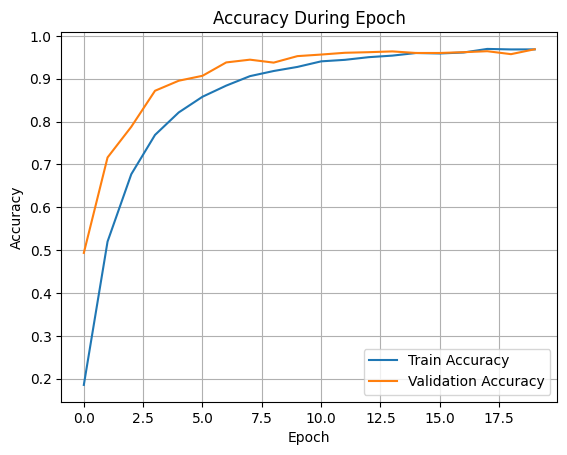

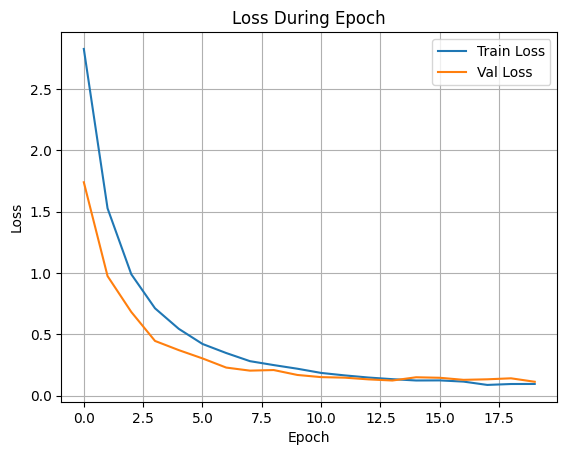

In [ ]:
import matplotlib.pyplot as plt

# Accuracy\
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy During Epoch')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss During Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

Save model

In [ ]:
import pickle, os
from tensorflow.keras.models import save_model

# path to save
model_path = '/content/drive/MyDrive/Data/ASL/Models/asl_model.keras'
class_names_path = '/content/drive/MyDrive/Data/ASL/Models/asl_labels.pkl'

# make dir if not exist
os.makedirs(os.path.dirname(model_path), exist_ok=True)
# Save model
model.save(model_path)

# Save class_names
with open(class_names_path, 'wb') as f:
    pickle.dump(class_names, f)

Predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predict : B (Confidence: 0.49)


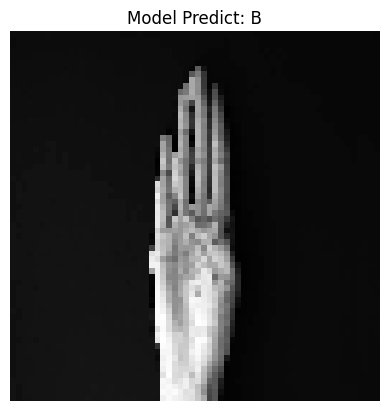

('B', np.float32(0.486698))

In [ ]:
from PIL import Image
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
import os

# Load model and class_names
model = tf.keras.models.load_model('/content/drive/MyDrive/Data/ASL/Models/asl_model.keras')
with open('/content/drive/MyDrive/Data/ASL/Models/asl_labels.pkl', 'rb') as f:
    class_names = pickle.load(f)

def predict_image(img_path, img_size=(64, 64)):
    if not os.path.exists(img_path):
        print("File doesn't exist:", img_path)
        return

    # Load and preprocess image
    img = load_img(img_path, color_mode='grayscale', target_size=img_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    pred = model.predict(img_array, batch_size=1)
    pred_class = np.argmax(pred)
    confidence = np.max(pred)

    print(f"Predict : {class_names[pred_class]} (Confidence: {confidence:.2f})")

    plt.imshow(img, cmap='gray')
    plt.title(f"Model Predict: {class_names[pred_class]}")
    plt.axis("off")
    plt.show()

    return class_names[pred_class], confidence

img_path = "/content/drive/MyDrive/Data/ASL/predict/B_test3.jpg"
predict_image(img_path)
# ảnh nhiễu, dataset khác (kết quả đúng)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predict : F (Confidence: 1.00)


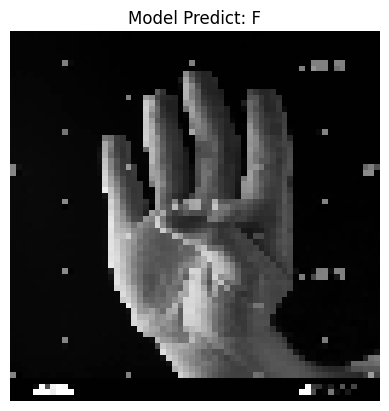

('F', np.float32(0.99999905))

In [ ]:
predict_image('/content/drive/MyDrive/Data/ASL/predict/B_test2.jpg')
# dataset khác, ảnh nhiễu + góc quay khác (dự đoán sai)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predict : C (Confidence: 1.00)


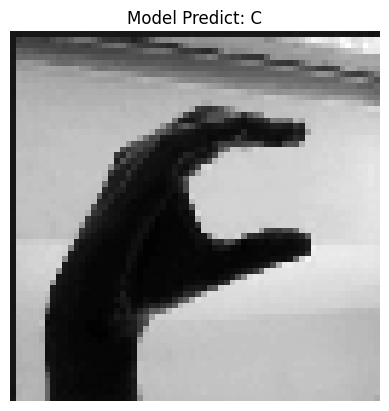

('C', np.float32(1.0))

In [ ]:
predict_image('/content/drive/MyDrive/Data/ASL/predict/C_test.jpg')
# cùng dataset (dự đoán đúng)